# Life Expectancy Analysis (WHO Dataset)

## Introduction
This notebook analyzes the WHO Life Expectancy dataset to understand the factors affecting life expectancy across different countries and years. The dataset consists of 2,930 rows and 22 columns, including various socioeconomic, health, and environmental factors. 


**Source**: [WHO Life Expectancy Dataset](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data)

The objective is to build a regression model to predict life expectancy based on these factors and identify the most significant contributors.


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Dataset
# Load the Life Expectancy dataset

In [2]:
file_path = 'data/Life Expectancy Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display first few rows of the dataset


In [3]:
print("Dataset Overview:")
print(data.head())

Dataset Overview:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Pop

# Display dataset information


In [4]:
print("\nDataset Info:")
data.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio

# Check for missing values


In [5]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [17]:
# Fill NaN values in the target variable with the mean
data['Life expectancy '] = data['Life expectancy '].fillna(data['Life expectancy '].mean())

# Check if the replacement worked
print(data['Life expectancy '].isnull().sum())  # Should return 0


0


# Exploratory Data Analysis (EDA)
## Distribution of Life Expectancy

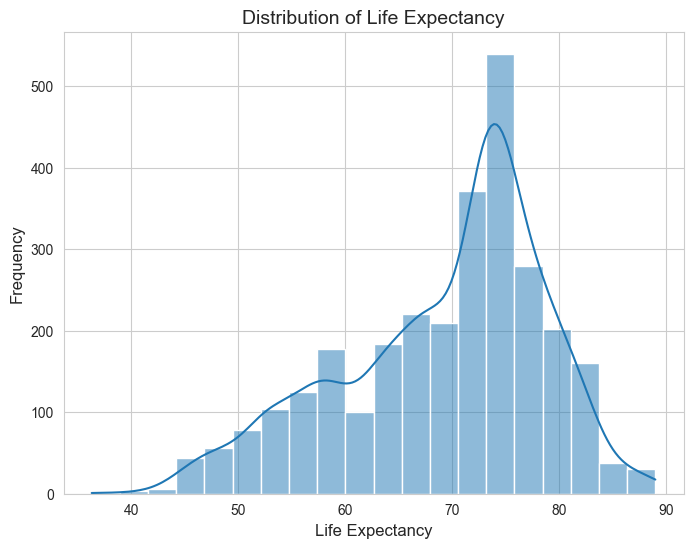

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Life expectancy '], kde=True, bins=20)
plt.title('Distribution of Life Expectancy', fontsize=14)
plt.xlabel('Life Expectancy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


## Correlation Heatmap

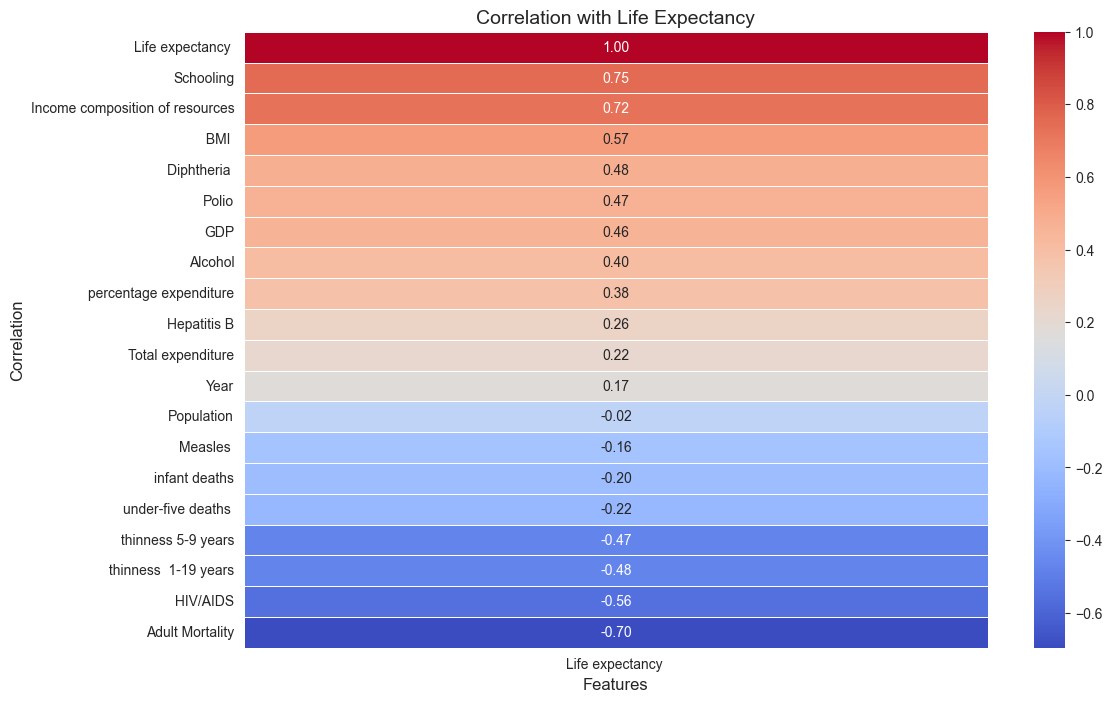

In [7]:
plt.figure(figsize=(12, 8))

# Filter numeric columns to avoid issues with non-numeric data
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation of all features with 'Life expectancy '
corr_to_life_expectancy = numeric_data.corr()[['Life expectancy ']].sort_values(by='Life expectancy ', ascending=False)

# Plot heatmap only for correlations with 'Life expectancy '
sns.heatmap(corr_to_life_expectancy, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation with Life Expectancy', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.show()


## Boxplot of Life Expectancy by Status (Developed/Developing):

Purpose: Show differences in life expectancy between developed and developing countries.


C:\Users\Danielle\AppData\Local\Temp\ipykernel_23356\119722292.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Life expectancy ', data=data, palette='Set2')


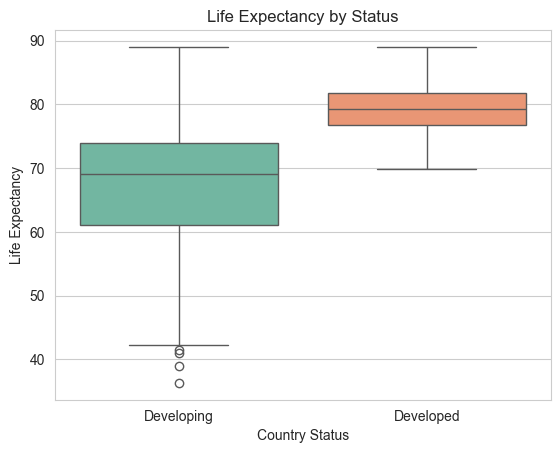

In [8]:
sns.boxplot(x='Status', y='Life expectancy ', data=data, palette='Set2')
plt.title('Life Expectancy by Status')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy')
plt.show()


## Scatter Plot of GDP vs. Life Expectancy:
Purpose: Explore the relationship between GDP and life expectancy.



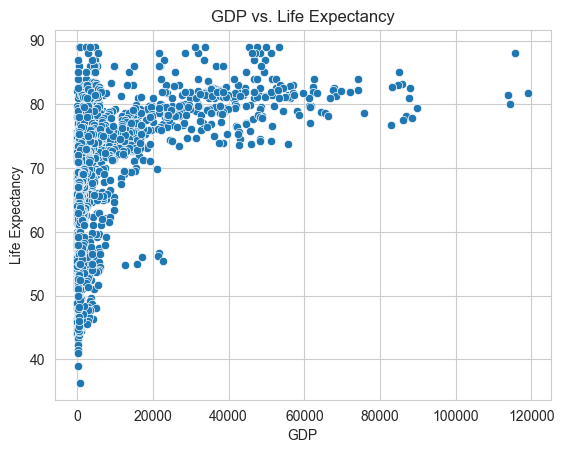

In [9]:
sns.scatterplot(x='GDP', y='Life expectancy ', data=data)
plt.title('GDP vs. Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()


## Visualization: Life Expectancy vs. Adult Mortality
Purpose: Adult mortality (death rate for individuals aged 15-60) is one of the most impactful factors affecting life expectancy. Exploring this relationship provides a direct insight into how health conditions and mortality influence the target variable

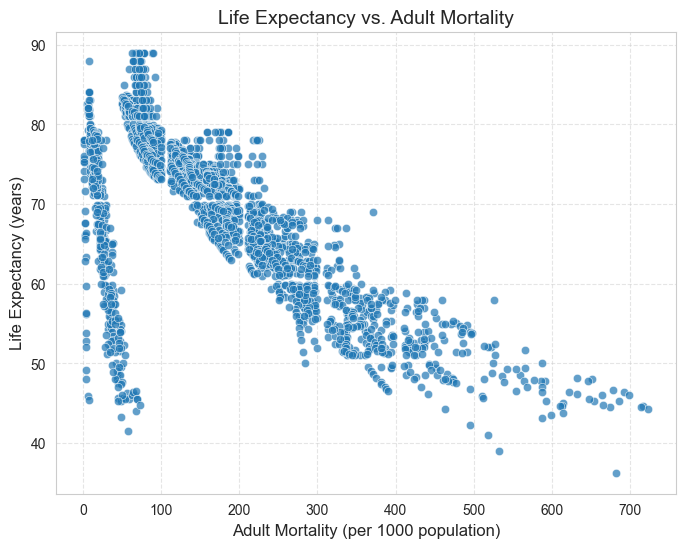

In [13]:
# Scatter plot for Life Expectancy vs. Adult Mortality
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Adult Mortality', y='Life expectancy ', data=data, alpha=0.7)
plt.title('Life Expectancy vs. Adult Mortality', fontsize=14)
plt.xlabel('Adult Mortality (per 1000 population)', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()



## Why we Chose This Visualization:

Relevance: Adult mortality captures a population's overall health and safety. A higher mortality rate often corresponds to poorer healthcare and living conditions.
Insight: By analyzing this plot, we can observe whether there is a strong negative correlation between adult mortality and life expectancy. This helps verify its significance as a predictor in the regression model.
Significance: If adult mortality shows a strong inverse relationship, it might indicate the need for targeted public health policies to improve life expectancy.

# 2. Baseline Model Pipeline


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Drop irrelevant columns (e.g., 'Country')
data = data.drop(columns=['Country'], errors='ignore')  # Remove if irrelevant

# Step 2: Encode categorical columns (e.g., 'Status')
data = pd.get_dummies(data, columns=['Status_Developing'], drop_first=True)

# Step 3: Define features and target
X = data.drop(columns=['Life expectancy '])
y = data['Life expectancy ']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the XGBoost model
model = XGBRegressor(random_state=42, enable_categorical=True)
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")


Mean Squared Error: 2.8893777072464935
Mean Absolute Error: 1.1535474284165572
R-Squared: 0.966648947052661


In [23]:
import numpy as np

# Calculate the correlation between predicted and actual values
predicted_vs_actual_corr = np.corrcoef(y_test, y_pred)[0, 1]

# Print the correlation
print(f"Correlation between predicted and actual life expectancy: {predicted_vs_actual_corr:.2f}")



Correlation between predicted and actual life expectancy: 0.98
